In [1]:
import csv
import numpy as np
import scipy as sp
import astropy as ap
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("tao_aponte_01_catalogue_3963.csv") #read in dataset
data

,Total_Stellar_Mass,Bulge_Stellar_Mass,Black_Hole_Mass,Cold_Gas_Mass,Hot_Gas_Mass,Ejected_Gas_Mass,Intracluster_Stars_Mass,Metals_Total_Stellar_Mass,Metals_Bulge_Mass,Metals_Cold_Gas_Mass,...,Snapshot_Number,Galaxy_ID,Central_Galaxy_ID,Simulation_Halo_ID,Keck_DEIMOS_DEEP_B_Absolute,Keck_DEIMOS_DEEP_B_Apparent,Keck_DEIMOS_DEEP_R_Absolute,Keck_DEIMOS_DEEP_R_Apparent,Keck_DEIMOS_DEEP_I_Absolute,Keck_DEIMOS_DEEP_I_Apparent
0,0.379666,0.000000,0.000000,0.388483,0.597879,0.922215,0.037507,0.003583,0.000000,0.004832,...,39,467002712000000000,467002712000000000,2946268972,-20.5679,24.2341,-20.8923,24.0621,-21.0405,23.6940
1,0.136539,0.000000,0.000000,0.858644,0.880154,0.446934,0.134356,0.000866,0.000000,0.003344,...,39,467002819000000000,467002819000000000,2938917265,-19.7931,24.4250,-19.9850,24.5366,-20.0706,24.3189
2,0.294770,0.051038,0.000101,0.684603,0.741515,0.706550,0.000000,0.001821,0.000311,0.004407,...,39,467002825000000000,467002825000000000,2939169738,-20.5011,23.8641,-20.6548,23.9137,-20.7294,23.6595
3,0.014943,0.000000,0.000000,0.030843,0.000000,0.181472,0.000000,0.000076,0.000000,0.000210,...,39,467000635000000013,467000635000000013,2938917354,-16.3827,30.0040,-16.9026,28.9767,-17.0557,28.1390
4,0.065332,0.000000,0.000000,0.087791,0.000798,0.559373,0.000000,0.000383,0.000000,0.000820,...,39,467000635000000012,467000635000000012,2938917355,-18.7029,25.7607,-18.9291,25.7635,-19.0260,25.4666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827971,1.990170,0.457452,0.000897,0.150992,12.166300,0.007979,0.659508,0.025149,0.005730,0.001174,...,57,113013364000000000,113013364000000000,4898720574,-19.4465,20.8083,-20.5662,18.9887,-20.9025,18.6181
827972,1.981850,0.971344,0.000770,0.018918,1.709370,1.652110,0.055369,0.025811,0.012004,0.000270,...,57,113013786000000000,113013786000000000,4903420208,-20.3681,19.8176,-21.3317,18.2022,-21.6289,17.8772
827973,0.256673,0.000000,0.000000,0.174229,0.000000,0.000000,0.000000,0.002342,0.000000,0.002468,...,57,113013388000000004,113013388000000000,4903418589,-17.7280,22.3944,-18.6977,20.8304,-18.9934,20.5002
827974,0.014744,0.000000,0.000000,0.065355,0.000000,0.082336,0.000000,0.000046,0.000000,0.000363,...,57,113021403000000000,113021403000000000,4900979472,-16.9771,22.6615,-17.1878,22.1179,-17.2654,22.0293


In [4]:
from astropy.cosmology import WMAP9 #import relevant cosmology (find way to automate this for each dataset)

In [5]:
#Estimate supernova rate per stellar mass using arbitrary parameters for now

try:
    supernovae_rate_per_stellar_mass = ((((1/100)))*((data['Total_Stellar_Mass'])))/(10**10.5)
except:
    supernovae_rate_per_stellar_mass = ((((1/100)))*((data['total_stellar_mass'])))/(10**10.5)
    
supernovae_rate_per_stellar_mass

0         1.200609e-13
1         4.317742e-14
2         9.321446e-14
3         4.725423e-15
4         2.065992e-14
              ...     
827971    6.293470e-13
827972    6.267160e-13
827973    8.116713e-14
827974    4.662431e-15
827975    4.249785e-15
Name: Total_Stellar_Mass, Length: 827976, dtype: float64

In [6]:
#Estimate supernova rate per star formation rate using arbitrary parameters for now

try:
    supernovae_rate_per_star_formation_rate = ((1/100))*(data['Total_Star_Formation_Rate'])
except:
    supernovae_rate_per_star_formation_rate = ((1/100))*(data['total_star_formation_rate'])
    
supernovae_rate_per_star_formation_rate

0         0.029227
1         0.015800
2         0.028522
3         0.000000
4         0.005040
            ...   
827971    0.000000
827972    0.000000
827973    0.000277
827974    0.000959
827975    0.000117
Name: Total_Star_Formation_Rate, Length: 827976, dtype: float64

In [7]:
#Insert supernova rates into tables

data.insert(loc=8,
          column='supernovae_rate_per_stellar_mass',
          value=supernovae_rate_per_stellar_mass)        

data.insert(loc=9,
          column='supernovae_rate_per_star_formation_rate',
          value=supernovae_rate_per_star_formation_rate)   

data

,Total_Stellar_Mass,Bulge_Stellar_Mass,Black_Hole_Mass,Cold_Gas_Mass,Hot_Gas_Mass,Ejected_Gas_Mass,Intracluster_Stars_Mass,Metals_Total_Stellar_Mass,supernovae_rate_per_stellar_mass,supernovae_rate_per_star_formation_rate,...,Snapshot_Number,Galaxy_ID,Central_Galaxy_ID,Simulation_Halo_ID,Keck_DEIMOS_DEEP_B_Absolute,Keck_DEIMOS_DEEP_B_Apparent,Keck_DEIMOS_DEEP_R_Absolute,Keck_DEIMOS_DEEP_R_Apparent,Keck_DEIMOS_DEEP_I_Absolute,Keck_DEIMOS_DEEP_I_Apparent
0,0.379666,0.000000,0.000000,0.388483,0.597879,0.922215,0.037507,0.003583,1.200609e-13,0.029227,...,39,467002712000000000,467002712000000000,2946268972,-20.5679,24.2341,-20.8923,24.0621,-21.0405,23.6940
1,0.136539,0.000000,0.000000,0.858644,0.880154,0.446934,0.134356,0.000866,4.317742e-14,0.015800,...,39,467002819000000000,467002819000000000,2938917265,-19.7931,24.4250,-19.9850,24.5366,-20.0706,24.3189
2,0.294770,0.051038,0.000101,0.684603,0.741515,0.706550,0.000000,0.001821,9.321446e-14,0.028522,...,39,467002825000000000,467002825000000000,2939169738,-20.5011,23.8641,-20.6548,23.9137,-20.7294,23.6595
3,0.014943,0.000000,0.000000,0.030843,0.000000,0.181472,0.000000,0.000076,4.725423e-15,0.000000,...,39,467000635000000013,467000635000000013,2938917354,-16.3827,30.0040,-16.9026,28.9767,-17.0557,28.1390
4,0.065332,0.000000,0.000000,0.087791,0.000798,0.559373,0.000000,0.000383,2.065992e-14,0.005040,...,39,467000635000000012,467000635000000012,2938917355,-18.7029,25.7607,-18.9291,25.7635,-19.0260,25.4666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827971,1.990170,0.457452,0.000897,0.150992,12.166300,0.007979,0.659508,0.025149,6.293470e-13,0.000000,...,57,113013364000000000,113013364000000000,4898720574,-19.4465,20.8083,-20.5662,18.9887,-20.9025,18.6181
827972,1.981850,0.971344,0.000770,0.018918,1.709370,1.652110,0.055369,0.025811,6.267160e-13,0.000000,...,57,113013786000000000,113013786000000000,4903420208,-20.3681,19.8176,-21.3317,18.2022,-21.6289,17.8772
827973,0.256673,0.000000,0.000000,0.174229,0.000000,0.000000,0.000000,0.002342,8.116713e-14,0.000277,...,57,113013388000000004,113013388000000000,4903418589,-17.7280,22.3944,-18.6977,20.8304,-18.9934,20.5002
827974,0.014744,0.000000,0.000000,0.065355,0.000000,0.082336,0.000000,0.000046,4.662431e-15,0.000959,...,57,113021403000000000,113021403000000000,4900979472,-16.9771,22.6615,-17.1878,22.1179,-17.2654,22.0293


In [8]:
#Finding solid angle for 2 square degree field (automate this for dataset)

from astropy import units as u
theta_RA  = 2 * 3600 * u.arcsec
theta_dec = 2 * 3600 * u.arcsec
Omega = (theta_RA * theta_dec).to(u.steradian).value # get rid of unit

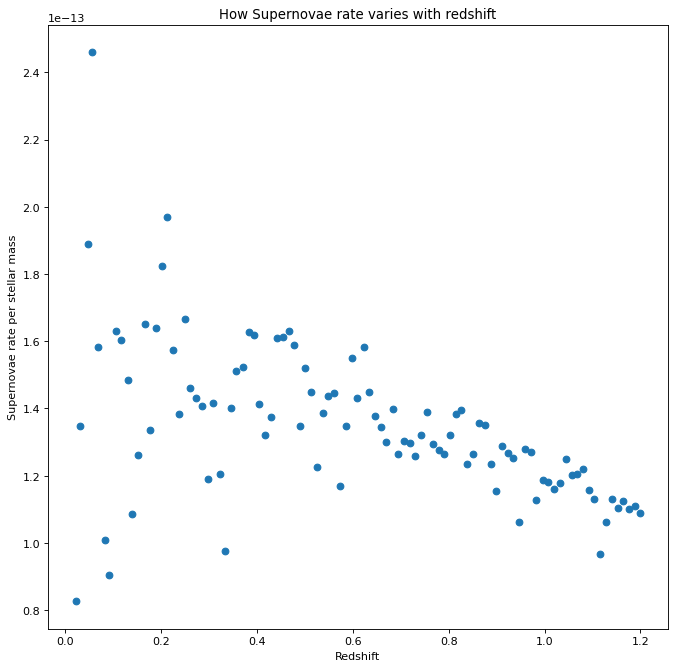

In [26]:
#Supernova rate per stellar mass (no volume correction)

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
sm = data['supernovae_rate_per_stellar_mass']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(1, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(1, len(bins_z))]

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, bin_means_sm)
plt.xlabel('Redshift')
plt.ylabel('Supernovae rate per stellar mass')
plt.title('How Supernovae rate varies with redshift')

plt.show()

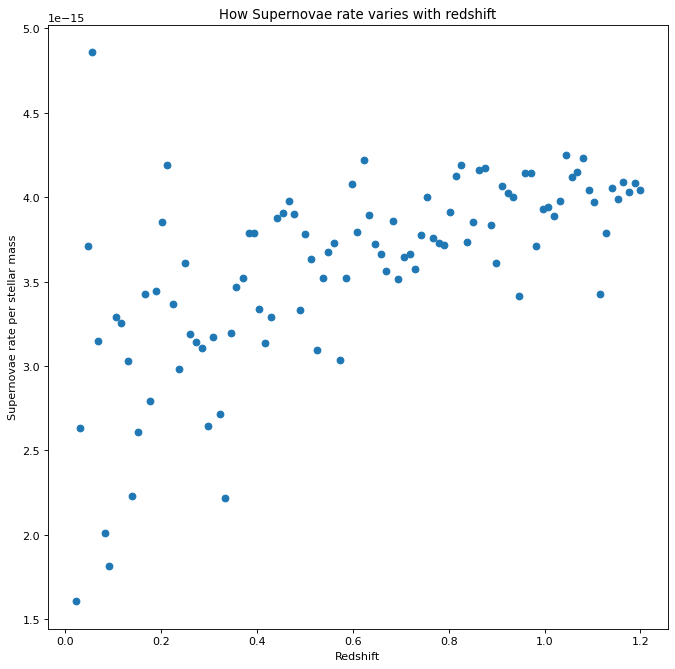

In [39]:
#Supernova rate per stellar mass (volume correction by dividing by comoving distance - incorrect)

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
binsize = (np.max(z) - np.min(z))/100
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = []
bin_means_sm = []

for i in range(1, len(bins_z)):
    d1 = WMAP9.comoving_distance((i)*(binsize)-1*(binsize)).value
    d2 = WMAP9.comoving_distance(i*(binsize)).value                             
    bin_means_z.append([z[digitized_z == i].mean()])
    bin_means_sm.append([(sm[digitized_z == i].mean())/(d2-d1)])


plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, bin_means_sm)
plt.xlabel('Redshift')
plt.ylabel('Supernovae rate per stellar mass')
plt.title('How Supernovae rate varies with redshift')

plt.show()

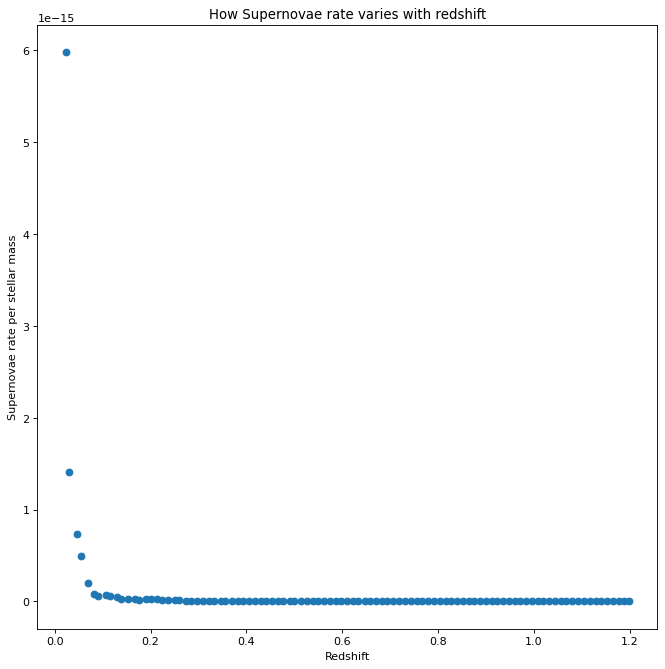

In [40]:
#Supernova rate per stellar mass (volume correction by dividing by volume - incorrect as already per 2 square degrees)

try:
    z = data['Redshift_Observed']
except:
    z = data['redshift_observed']
    
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
binsize = (np.max(z) - np.min(z))/100
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = []
bin_means_sm = []

for i in range(1, len(bins_z)):
    d1 = WMAP9.comoving_distance((i)*(binsize)-1*(binsize)).value
    d2 = WMAP9.comoving_distance(i*(binsize)).value
    V = (Omega/3) * (d2**3 - d1**3)                              
    bin_means_z.append([z[digitized_z == i].mean()])
    bin_means_sm.append([(sm[digitized_z == i].mean())/V])


plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, bin_means_sm)
plt.xlabel('Redshift')
plt.ylabel('Supernovae rate per stellar mass')
plt.title('How Supernovae rate varies with redshift')

plt.show()

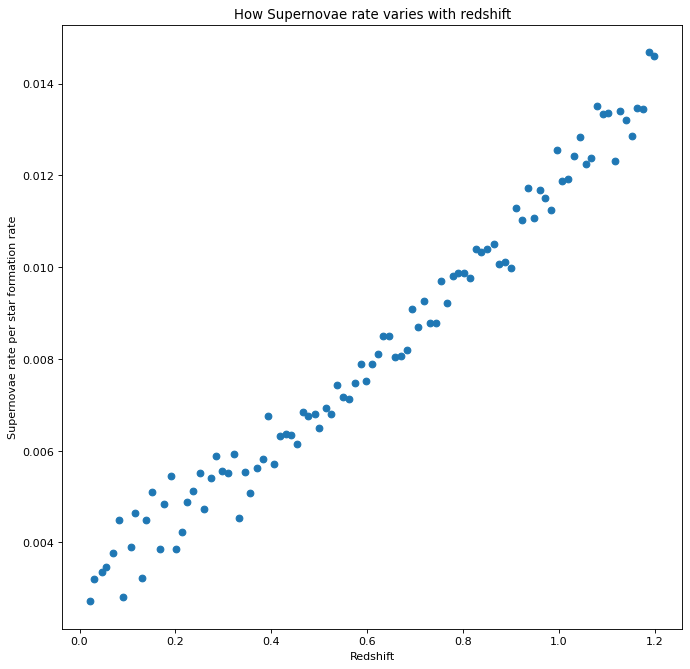

In [28]:
#Supernova rate per star formation rate (no volume correction)

z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(1, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(1, len(bins_z))]

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, bin_means_sfr)
plt.xlabel('Redshift')
plt.ylabel('Supernovae rate per star formation rate')
plt.title('How Supernovae rate varies with redshift')

plt.show()

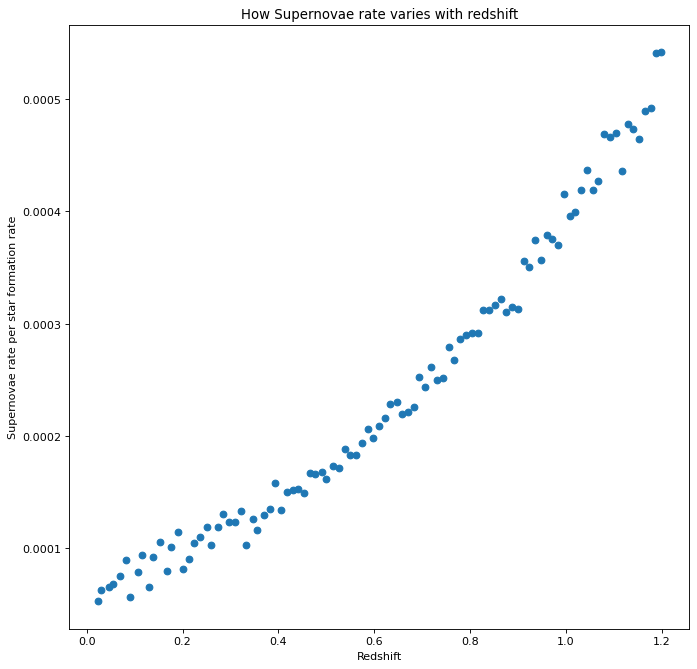

In [37]:
#Supernova rate per star formation rate (volume correction by dividing by comoving distance - incorrect)

z = data['Redshift_Observed']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
binsize = (np.max(z) - np.min(z))/100
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = []
bin_means_sfr = []

for i in range(1, len(bins_z)):
    d1 = WMAP9.comoving_distance((i)*(binsize)-1*(binsize)).value
    d2 = WMAP9.comoving_distance(i*(binsize)).value                    
    bin_means_z.append([z[digitized_z == i].mean()])
    bin_means_sfr.append([(sfr[digitized_z == i].mean())/(d2-d1)])

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, bin_means_sfr)
plt.xlabel('Redshift')
plt.ylabel('Supernovae rate per star formation rate')
plt.title('How Supernovae rate varies with redshift')

plt.show()

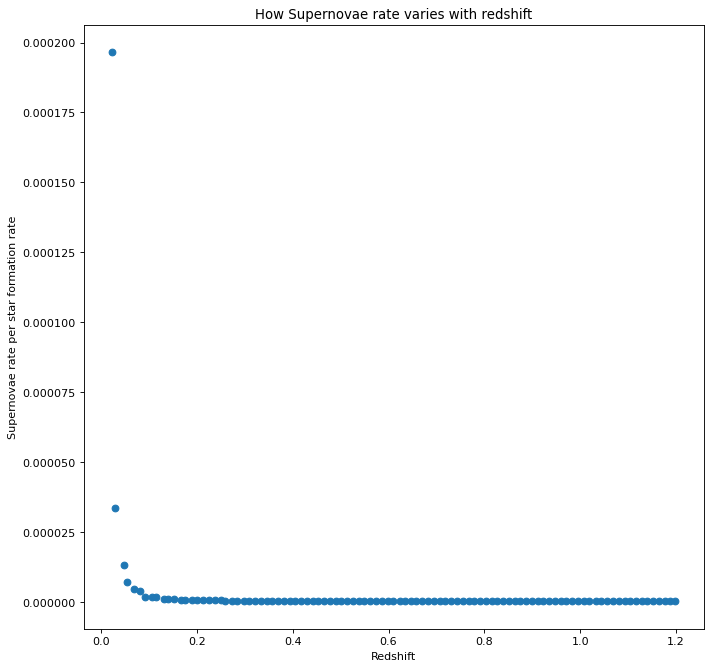

In [41]:
#Supernova rate per star formation rate (volume correction by dividing by volume - incorrect as already per 2 square degrees)

z = data['Redshift_Observed']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
binsize = (np.max(z) - np.min(z))/100
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = []
bin_means_sfr = []

for i in range(1, len(bins_z)):
    d1 = WMAP9.comoving_distance((i)*(binsize)-1*(binsize)).value
    d2 = WMAP9.comoving_distance(i*(binsize)).value
    V = Omega/3 * (d2**3 - d1**3)                              
    bin_means_z.append([z[digitized_z == i].mean()])
    bin_means_sfr.append([(sfr[digitized_z == i].mean())/V])

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, bin_means_sfr)
plt.xlabel('Redshift')
plt.ylabel('Supernovae rate per star formation rate')
plt.title('How Supernovae rate varies with redshift')

plt.show()

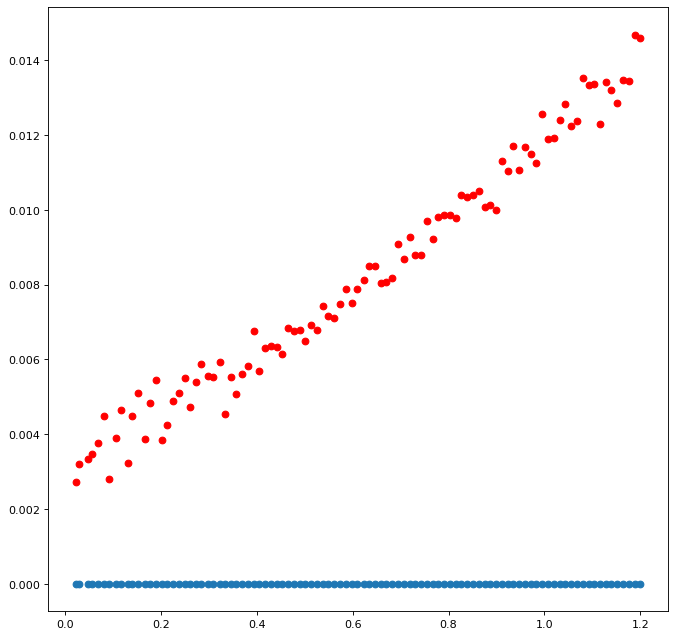

In [25]:
z = data['Redshift_Observed']
sm = data['supernovae_rate_per_stellar_mass']
sfr = data['supernovae_rate_per_star_formation_rate']

bins_z = np.linspace(np.min(z), np.max(z), 100)
digitized_z = np.digitize(z, bins_z) #creates mask for each bin

bin_means_z = [z[digitized_z == i].mean() for i in range(1, len(bins_z))]
bin_means_sm = [sm[digitized_z == i].mean() for i in range(1, len(bins_z))]
bin_means_sfr = [sfr[digitized_z == i].mean() for i in range(1, len(bins_z))]

plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(bin_means_z, bin_means_sm)
plt.scatter(bin_means_z, bin_means_sfr, color='r')

plt.show()